1. Standard Neural Network (DNN) for fashion mnist

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

2.2.0
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4852 - accuracy: 0.8282
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3622 - accuracy: 0.8682
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3257 - accuracy: 0.8799
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3030 - accuracy: 0.8884
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8793


2. Convolutional Neural Network

In [2]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(28,28,1)),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

model.summary()

model.fit(training_images, training_labels, epochs = 5)

test_loss = model.evaluate(test_images, test_labels)

2.2.0
4423680/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_____________________________________________________

2.1 Changing CNN filter from 64 to 32/16

In [18]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images / 255.0
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape = (28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(16,(3,3),activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

2.2.0
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_5 (Dense)              (None, 10)         

2.2 Removing second convolution and observing its impact

In [21]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images / 255.0
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

2.2.0
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3793 - accuracy: 0.8654
Epo

2.3 Adding one more convolutions and seeing its impact

In [23]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images / 255.0
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

2.2.0
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)         

2.4 Implementing callback to check loss function and to stop training if threahold is reached

In [6]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.26):
      print("\n Reached 90% accuracy. So cancelling training.")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu, input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(62,(3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)

])

model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])
test_loss = model.evaluate(test_images, test_labels)

2.2.0
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 62)        35774     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 62)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1550)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               198528    
_________________________________________________________________
dense_7 (Dense)              (None, 10)         

3. Visualizing Convolutions and Pooling

In [4]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


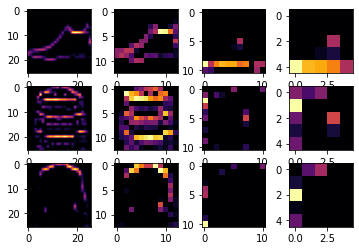

In [15]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs=layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
  axarr[2,x].grid(False)